<a href="https://colab.research.google.com/github/NekoDK/Omgu_DA/blob/OmguDA_2/OmguDA_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import numpy as np
import pandas as pd

In [12]:
dfX = pd.read_excel('Xmod.xlsx')
dfY = pd.read_excel('Ymod.xlsx')

x = dfX.values
y = dfY.values

In [13]:
mxn = x.shape
n = mxn[1]
matrix = np.ones((1, n))


In [14]:
X1 = np.insert(x,0,matrix,axis=0)
X = X1.transpose()

Xt = X.transpose()
Y = y.transpose()

XtX = np.dot(Xt,X)
Xi = np.linalg.inv(XtX)
XtXi_Xt = np.dot(Xi,Xt)

In [15]:
A = np.dot(XtXi_Xt,Y)
Ynew = np.dot(X,A)

In [16]:
matrixmin = Ynew - Y
mse = np.mean(matrixmin**2)
mseold = np.mean(Y)

In [17]:
Y_sr= (Y-mseold)**2
Y_sr = np.mean(Y_sr)
answer=(1-(mse/Y_sr))

In [18]:
print(mse)
print(answer)

3.028908143433451
0.7195455422746805


In [19]:
import matplotlib.pyplot as plt

In [20]:
# График зависимости фактических и предсказанных значений
def plot_actual_vs_predicted(y_true, y_pred):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_true, y_pred, alpha=0.7)
    plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], color='red', linestyle='--')
    plt.xlabel('Фактические значения')
    plt.ylabel('Предсказанные значения')
    plt.title('Фактические vs Предсказанные значения')
    plt.show()

In [31]:
# График остатков
def plot_residuals(y_true, y_pred):
    residuals = y_true - y_pred
    plt.figure(figsize=(8, 6))
    plt.scatter(y_pred, residuals, alpha=0.7)
    plt.hlines(0, min(y_pred), max(y_pred), colors='red', linestyles='--')
    plt.xlabel('Предсказанные значения')
    plt.ylabel('Остатки')
    plt.title('График остатков')
    plt.show()

График зависимости фактических и предсказанных значений


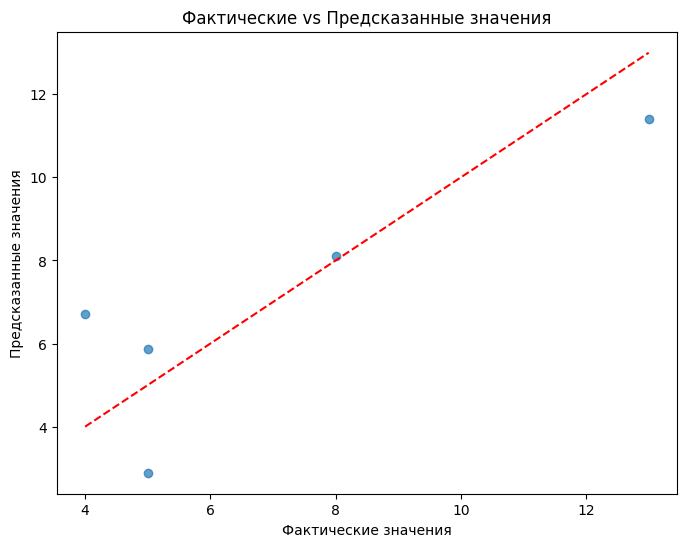

In [29]:
print("График зависимости фактических и предсказанных значений")
plot_actual_vs_predicted(Y, Ynew)

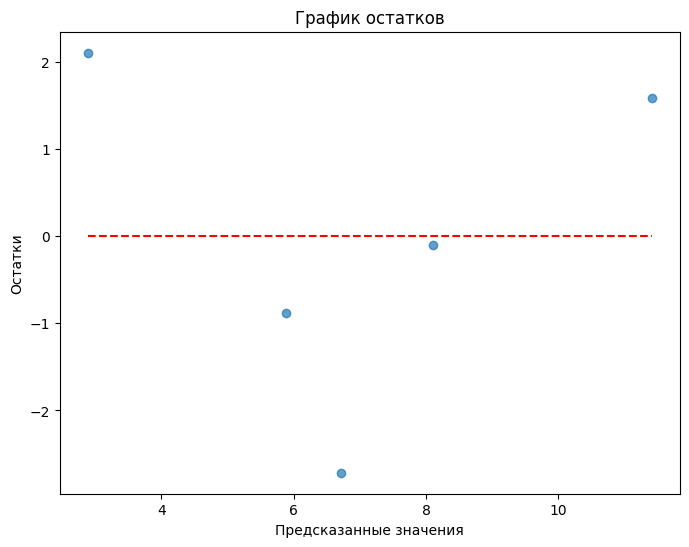

In [26]:
plot_residuals(Y, Ynew)